# Naval Propulsion Plants Maintenance Prediction

1. Introduction
2. Explaratory Data Analysis
3. Data Processing
4. Model Selection
5. Final Prediction
6. Conclusion

# 1. Introduction

This work is inspired by paper Condition-Based Maintenance of Naval Propulsion Systems with Supervised Data Analysis.

The main issue explored within the project work is Preventive Maintenance, a service concept, that implies the life cycle estimation of a certain component. In comparison with the Corrective Maintenance, the PM allows to ensure a component service, repair or substitution before its breakdown, that can raise the efficiency level and reduce costs.

In the current work, the Gas Turbine and Compressor decay state coefficients are estimated based on number of propulsion system parameters: shaft torque, rate of revolutions, compressor inlet air temperature and pressure, turbine injection control and fuel flow. To build an estimator, the ML and DL techniques are applied.

In [1]:
# Impoorting required libraries.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
df = pd.read_csv("assignment-dataset.csv")
df.drop('index', axis=1, inplace=True)
df.head(4)

,Lever position,Ship speed (v),Gas Turbine (GT) shaft torque (GTT) [kN m],GT rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],Hight Pressure (HP) Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],GT exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975


In [3]:
df.columns

Index(['Lever position ', 'Ship speed (v) ',
       'Gas Turbine (GT) shaft torque (GTT) [kN m]  ',
       'GT rate of revolutions (GTn) [rpm]  ',
       'Gas Generator rate of revolutions (GGn) [rpm]  ',
       'Starboard Propeller Torque (Ts) [kN]  ',
       'Port Propeller Torque (Tp) [kN]  ',
       'Hight Pressure (HP) Turbine exit temperature (T48) [C]  ',
       'GT Compressor inlet air temperature (T1) [C]  ',
       'GT Compressor outlet air temperature (T2) [C]  ',
       'HP Turbine exit pressure (P48) [bar]  ',
       'GT Compressor inlet air pressure (P1) [bar]  ',
       'GT Compressor outlet air pressure (P2) [bar]  ',
       'GT exhaust gas pressure (Pexh) [bar]  ',
       'Turbine Injecton Control (TIC) [%]  ', 'Fuel flow (mf) [kg/s]  ',
       'GT Compressor decay state coefficient  ',
       'GT Turbine decay state coefficient '],
      dtype='object')

In [4]:
df.columns = ['lp', 'v', 'gtt', 'gtn', 'ggn', 'ts', 'tp', 't48',
                                  't1', 't2', 'p48', 'p1', 'p2', 'pexh', 'tic', 'mf', 'y_1', 'y_2']
df.head(3)

,lp,v,gtt,gtn,ggn,ts,tp,t48,t1,t2,p48,p1,p2,pexh,tic,mf,y_1,y_2
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975


# 2. Exploratory Data Analysis

In [5]:
df.shape

(11934, 18)

In [6]:
df.describe()

,lp,v,gtt,gtn,ggn,ts,tp,t48,t1,t2,p48,p1,p2,pexh,tic,mf,y_1,y_2
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


Judging by the data main statistics, the t1 and p1 features (the GT compressor inlet air temperature and pressure) are constant at the levels of 288 degrees Celcium and 9.980 bars respectively, so these features can be omitted during the analysis.

In [7]:
df.drop(['t1','p1'], axis=1, inplace=True)
df.head(3)

,lp,v,gtt,gtn,ggn,ts,tp,t48,t2,p48,p2,pexh,tic,mf,y_1,y_2
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,550.563,1.096,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,581.658,1.331,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,587.587,1.389,7.574,1.020,13.086,0.259,0.95,0.975


In [8]:
# checking the number of missing values
df.isnull().sum().to_frame().T

,lp,v,gtt,gtn,ggn,ts,tp,t48,t2,p48,p2,pexh,tic,mf,y_1,y_2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


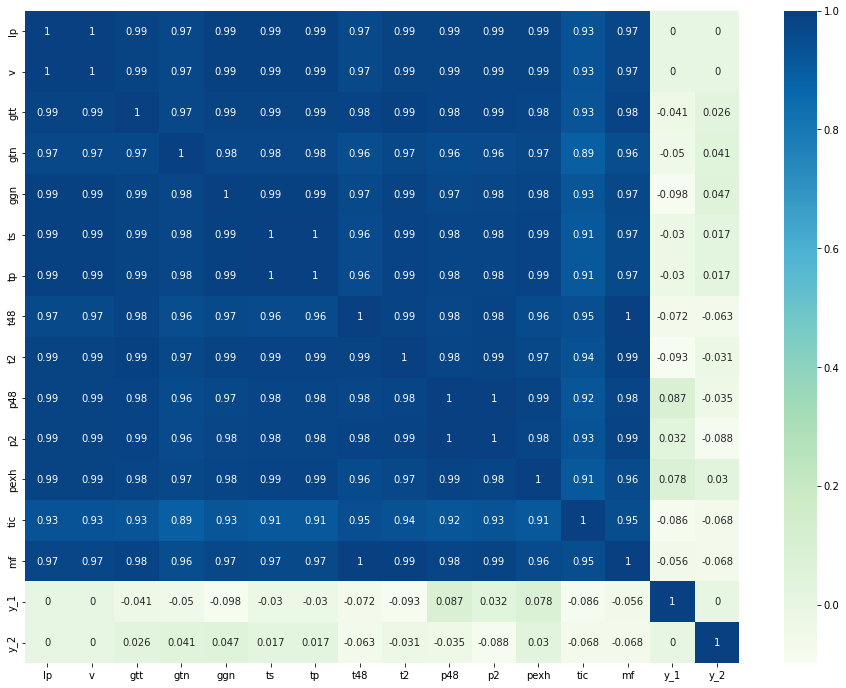

In [9]:
# plotting the correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(df.corr('spearman'), cmap='GnBu', annot = True)
plt.show()

As it can be seen from the correlation matrix, the following features have strong linear correlation between each other:

lever position and ship speed, 
gas turbine torque and starboard and portside torques.
...

All the features are slightly correlated with the target functions.

In total, the data is highly correlated, that might cause the problem while fitting the linear model. To avoid the issue, feature selection should be conducted.

During the model selection, I tried to fit the models with only 5 selected features (see below), but the accuracy was lower in comparison with the models fitted with all the data presented in the set.

For the future analysis, only several features are kept:

1. gas turbine shaft torque (as a torque feature)
2. turbine exit temperature (as a temperature feature)
3. turbine exit pressure (as a pressure feature)
4. turbine injecton control (TIC)
5. fuel flow

Let's take a look at some features distributions.

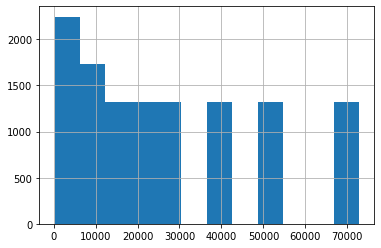

In [10]:
plt.hist(df.gtt, bins=12)
plt.grid()
plt.show()

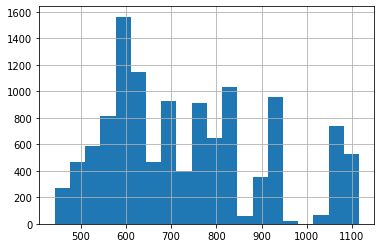

In [11]:
plt.hist(df.t48, bins=20)
plt.grid()
plt.show()

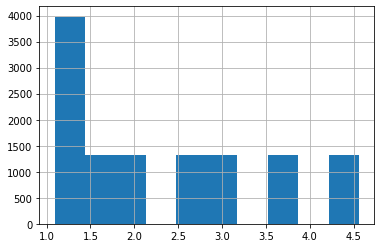

In [12]:
plt.hist(df.p48, bins=10)
plt.grid()
plt.show()

# 3. Data Preprocessing

In [13]:
X = df.iloc[:,:-2]
y_1 = df.iloc[:,-2].values
y_2 = df.iloc[:,-1].values

In [14]:
# scaling the data to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)

# 4. Model Selection

The following models are built and evaluated in order to choose different approaches to regression problem:

1. Predict compressor & turbine decay coefficient using Linear regression (1st model).
2. Predict compressor & turbine decay coefficient using any of supervised learning algorithm of your choice. (2nd model), i.e. Random Forest Regressor

In [15]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Linear Regression Model

In [16]:
lr = LinearRegression(n_jobs=-1)
cross_val_score(lr, X, y_1, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=1).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.2s finished


-0.0050096345344464634

# Random Forest Regressor Model

In [17]:
grid = {'n_estimators':[100, 150, 200, 250]}
rf = GridSearchCV(RandomForestRegressor(), grid, n_jobs=-1, cv=5, verbose=1)
rf.fit(X, y_1)
rf.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomForestRegressor(n_estimators=250)

In [18]:
cross_val_score(rf.best_estimator_, X, y_1, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=1).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.3min finished


-0.002020910881313614

# 5. Final Prediction

In [19]:
# ML algorithms prediction function
def predict(algo, X, y, test_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    df = pd.DataFrame([y_test, y_pred]).T
    df.rename(columns={0:'true', 1:'pred'}, inplace=True)
    df['error'] = abs(df.pred - df.true).round(4)
    df.sort_values('error', ascending = False, inplace=True)
    return df

# Compressor decay state coefficient prediction

Linear Regression

In [20]:
algo = LinearRegression(n_jobs=-1)
predict(algo, X, y_1).head(10)

MSE: 3.441359132505435e-05
MAE: 0.004652031370967987


,true,pred,error
43,0.950,0.968786,0.0188
1342,0.998,0.979303,0.0187
1761,0.999,0.980444,0.0186
1870,0.951,0.969488,0.0185
1410,0.999,0.980499,0.0185
2114,0.954,0.972424,0.0184
195,0.950,0.968051,0.0181
1332,0.997,0.979051,0.0179
888,0.998,0.980230,0.0178
52,0.953,0.970794,0.0178


Random Forest Regressor

In [21]:
algo = RandomForestRegressor(n_estimators=150)
predict(algo, X, y_1).head(10)

MSE: 1.1976629334822397e-06
MAE: 0.00046328725038401143


,true,pred,error
1248,1.000,0.977307,0.0227
566,1.000,0.977513,0.0225
750,0.998,0.986520,0.0115
1040,0.999,0.989753,0.0092
895,0.995,0.985967,0.0090
1082,0.966,0.973780,0.0078
488,0.996,0.988527,0.0075
2087,0.992,0.984993,0.0070
2188,0.969,0.975933,0.0069
14,0.998,0.991387,0.0066


# Turbine decay state coefficient prediction

Linear Regression

In [22]:
algo = LinearRegression(n_jobs=-1)
predict(algo, X, y_2).head(10)

MSE: 4.680821745012341e-06
MAE: 0.0016461997975821012


,true,pred,error
1901,0.999,0.989812,0.0092
819,0.994,0.985035,0.0090
937,0.975,0.983874,0.0089
415,0.993,0.984072,0.0089
1751,0.996,0.987465,0.0085
1124,0.999,0.990676,0.0083
2096,0.992,0.983793,0.0082
1188,0.994,0.985834,0.0082
1947,0.976,0.983972,0.0080
760,0.980,0.987717,0.0077


Random Forest Regressor

In [23]:
algo = RandomForestRegressor(n_estimators=150)
predict(algo, X, y_2).head(10)

MSE: 5.529951124144603e-07
MAE: 0.0003369389750034732


,true,pred,error
647,0.976,0.987160,0.0112
200,0.975,0.984127,0.0091
2203,0.980,0.987320,0.0073
1278,0.978,0.985167,0.0072
2054,0.975,0.981160,0.0062
1283,0.977,0.982473,0.0055
490,0.990,0.984547,0.0055
1710,0.975,0.980167,0.0052
401,1.000,0.995187,0.0048
366,1.000,0.995260,0.0047


# 6. Conclusion

During the project work, the propulsion plants preventive maintenance possibility was examined. The gas compressor and turbine decay state coefficients were predicted based on the Data Driven Model GT parameters.

The model showed the best results is Random Forest algorithm with the performance: MSE = 9.5e-07, and MAE = 0.0005 for Compressor Decay State Coefficient; MSE = 4.2e-07, and MAE = 0.0003 for Turbine Decay State Coefficient.
    
The performance of each model is accurate enough to be used in the industrial applications. The final model can be chosen between the explored based on the time and power efficiency.

It turned out, that the models fitted with the 14 features (all except constant compressor inlet air temperature and pressure features) show more accurate results than the ones fitted with the chosen set of 5 parameters (in accordance with the correlation matrix).    